# Classification problems
Classification is done on labeled data and is a supervized learning technique

* What if we don't want numbers (as in regression type ml) but classes?
  * Cars, weekdays, emotions, etc.

**[Study here](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)**

## Examples of classifications:
1. KNearest Neighbor
2. Decision tree
3. Neural networks

In [5]:
!ls images/knn*

images/knn1.png  images/knn2.png  images/knn3.png


## KNN (k-nearest neighbor)
**From Scikit learn** this algorithm is used in both supervised and unsupervised learning and in both regression, classfication and clustering.

From the documentation: "The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data"

It’s important to find the optimal k-value (amount of nearest neighbors to consult) when analyzing the dataset to avoid overfitting and underfitting of the dataset. To find the right k-value is a matter of **trial and error**.

Illustration taken from: [Here](https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e)

![](images/knn1.png)  
Suppose, if we add a new glass of wine in the dataset. We would like to know whether the new wine is red or white?

<img src="images/knn2.png"/>
Let’s say k = 5 and the new data point is classified by the majority of votes from its five neighbours and the new point would be classified as red since four out of five neighbours are red.
<img src="images/knn3.png"/>
Let’s say k = 5 and the new data point is classified by the majority of votes from its five neighbours and the new point would be classified as red since four out of five neighbours are red.

### Picking a value for ‘K’
There is no structured method to find the best value for “K”. 
We need to find out with various values by trial and error and assuming that training data is unknown.

In [7]:
# KNN used for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
  
# Loading data
iris_data = load_iris()
  
# Create feature and target arrays
X = iris_data.data
y = iris_data.target
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
k = 7 
knn = KNeighborsClassifier(n_neighbors=k)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
print(y_test)
print(knn.predict(X_test))
print(knn.score(X_test, y_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
0.9666666666666667


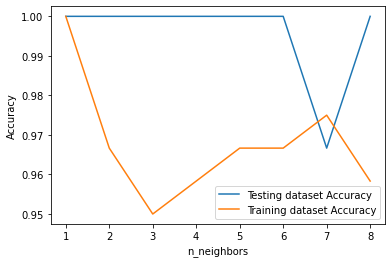

In [1]:
# find the right k-value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
  
irisData = load_iris()
  
# Create feature and target arrays
X = irisData.data
y = irisData.target

X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Try out different k-values for best accuracy on both test and traininig data
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Decision tree classifier
Read more [here](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
![](images/decision-tree.png)

## Example: predicting flower classes

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

iris = load_iris()

print(type(iris))
print(iris.keys())
X = iris.data # features 
y = iris.target # result or classification

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [13]:
# column 0-3 are the 4 variables: sepal_length, sepal_width, petal_length, petal_width - column 4 is the classification ('setosa', 'versicolor' or 'virginica')
import pandas as pd
pd.read_csv('data/iris.csv',header=None, skiprows=1)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [16]:
y[48:52] # target or classification

array([0, 0, 1, 1])

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### From documentation:
**criterion{“gini”, “entropy”}, default=”gini”**

    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
**Gini Impurity** is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set.

Gini impurity is lower bounded by 0, **with 0 occurring** if the data set contains **only one class**.


In [18]:
# internal nodes = features, leaf_nodes = target (outcome), branch = decision rule

model = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [9]:
p = model.predict([[6.1, 2.8, 4. , 1.3]])
print(p)
iris.target_names[p][0]

[1]


'versicolor'

In [10]:
# Determine accuracy of model prediction (0 to 1, where 1 is 100% correct prediction)
y_predicted = model.predict(X_test)
accuracy_score(y_test,y_predicted)

0.9333333333333333

[Confusion matrix](https://machinelearningmastery.com/confusion-matrix-machine-learning/) for measuring model precision

## Install graphviz
https://rdrr.io/cran/ndtv/man/install.graphviz.html

## What model was created for the categorization of iris flowers:

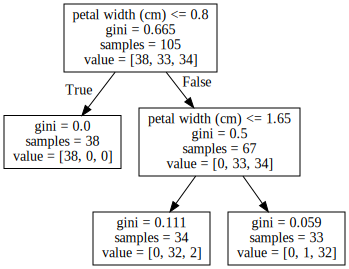

In [11]:
# After fitting 4 variables and a target 150 times the model looks like this:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG
graph = Source( export_graphviz(model, out_file=None, feature_names=iris.feature_names))
SVG(graph.pipe(format='svg'))
# gini: a statistical measure of the degree of variation represented in a set of values (like distribution)

## Sklearn

https://scikit-learn.org/stable/index.html

## Exercise decision tree
<img src="https://lh3.googleusercontent.com/proxy/fbplszDOBAc7pUTPpJOI6mpZlkomRVvOQrTYUKuyYtyD_nE4I4ZY7Zr_8oK5b4c8t0vH4oG2IZm0Ux7iVBvYjHUw48V8F2fTESMBst9J0iZiDZz9JYWqdklm" width="200"/>

Use a dataset with 3 labels: L, R, B (left, right, balanced) Given 4 input values (left weight, left dist, right weight, right dist) predict the outcome (Label). Dataset is a matrix with shape (625,5) ala:
```python
B  1  1  1  1
R  1  1  1  2
R  1  1  1  3
L  1  1  1  4
```
1. Importing the required packages 
```python
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
```
2. Import dataset: `https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data`
  -  Balance Scale Weight & Distance
3. Split dataset (input variables and target) Hint: first column is the target
4. Split dataset into training data and test data using train_test_split()
5. Create a model (DecisionTreeClassifier(criterion = "gini", random_state=100,max_depth=3, min_samples_leaf=5)
6. Fit model with training data
7. Make predictions on test data (using  predicted_y = prediction(X_test, model))
8. Calculate model accuracy with cal_accuracy(y_test, predicted_y) 

[If you get stuck see solution](https://www.geeksforgeeks.org/decision-tree-implementation-python/)